# Importing Pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing plotly , requires version >= 1.9.0

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()
print(__version__)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


2.1.0


# Importing Cufflinks

In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Loading the Data for Non Veterans for age 18 and above (Annually)

In [4]:
non_veterans_18_and_over_annually=pd.read_csv('NonVeterans_18_and_over_annualy.csv')


In [5]:
non_veterans_18_and_over_annually.head()

,series_id,year,period,value,footnote_codes,date,series_title
0,LNU02049603,2006,M13,64656.0,NaN,12/31/06,"(Unadj) Employment Level - Women, Nonveterans,..."
1,LNU00049603,2006,M13,112069.0,NaN,12/31/06,"(Unadj) Population Level - Women, Nonveterans,..."
2,LNU00049602,2006,M13,84518.0,NaN,12/31/06,"(Unadj) Population Level - Men, Nonveterans, 1..."
3,LNU04049603,2006,M13,4.4,NaN,12/31/06,"(Unadj) Unemployment Rate - Women, Nonveterans..."
4,LNU04049602,2006,M13,4.5,NaN,12/31/06,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."


# Data Processing : Taking the data for Men, Women and All gender separetly

In [6]:
non_veterans_18_and_over_annually_all=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over"]
non_veterans_18_and_over_annually_women=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Women, Nonveterans, 18 years and over"]
non_veterans_18_and_over_annually_men=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Men, Nonveterans, 18 years and over"]


In [7]:
non_veterans_18_and_over_annually_men.head()

,series_id,year,period,value,footnote_codes,date,series_title
4,LNU04049602,2006,M13,4.5,NaN,12/31/06,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
25,LNU04049602,2007,M13,4.6,NaN,12/31/07,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
38,LNU04049602,2008,M13,6.0,NaN,12/31/08,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
63,LNU04049602,2009,M13,10.3,NaN,12/31/09,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
79,LNU04049602,2010,M13,10.5,NaN,12/31/10,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."


In [8]:
non_veterans_18_and_over_annually_women.head()

,series_id,year,period,value,footnote_codes,date,series_title
3,LNU04049603,2006,M13,4.4,NaN,12/31/06,"(Unadj) Unemployment Rate - Women, Nonveterans..."
32,LNU04049603,2007,M13,4.3,NaN,12/31/07,"(Unadj) Unemployment Rate - Women, Nonveterans..."
43,LNU04049603,2008,M13,5.2,NaN,12/31/08,"(Unadj) Unemployment Rate - Women, Nonveterans..."
56,LNU04049603,2009,M13,7.8,NaN,12/31/09,"(Unadj) Unemployment Rate - Women, Nonveterans..."
81,LNU04049603,2010,M13,8.4,NaN,12/31/10,"(Unadj) Unemployment Rate - Women, Nonveterans..."


# Percentage change in Unemployment Rate for All Gender ( 2006-2016)

Text(0.5,1,'Unemployment Rate % Change')

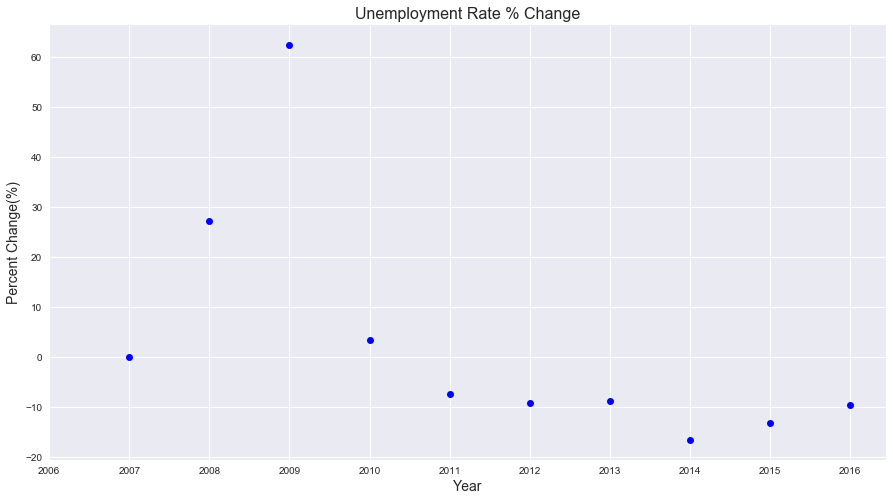

In [9]:
plt.figure(figsize=(15,8))
plt.plot(non_veterans_18_and_over_annually_all['year'],non_veterans_18_and_over_annually_all['value'].pct_change()*100,'bo')
plt.xticks(range(2006,2017))
plt.xlabel('Year',fontdict={'fontsize':14})
plt.ylabel('Percent Change(%)',fontdict={'fontsize':14})
plt.title('Unemployment Rate % Change',fontdict={'fontsize':16})


# Percentage in Unemployment Rate in Men and Women (2006-2016)

Plotly was used because we wanted to make it interactive as there are two graphs

In [10]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    y = (non_veterans_18_and_over_annually_men['value']),
    x = non_veterans_18_and_over_annually_men['year'],
    mode = 'lines+markers',
    name = 'Men',

)
trace1 = go.Scatter(
    y = (non_veterans_18_and_over_annually_women['value']),
    x = non_veterans_18_and_over_annually_women['year'],
    mode = 'lines+markers',
    name = 'Women',
)



layout= go.Layout(
    title= 'Unemployment Rate(%)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



In [11]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    y = (non_veterans_18_and_over_annually_men['value'].pct_change()*100),
    x = non_veterans_18_and_over_annually_men['year'],
    mode = 'lines+markers',
    name = 'Men',

)
trace1 = go.Scatter(
    y = (non_veterans_18_and_over_annually_women['value'].pct_change()*100),
    x = non_veterans_18_and_over_annually_women['year'],
    mode = 'lines+markers',
    name = 'Women',
)



layout= go.Layout(
    title= 'Unemployment Rate(% Changes)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



# Loading the data for all Races (Asian, White, Black or African American,Hispanic or Latino)

In [12]:
non_veterans_anually_races=pd.read_csv('annually_races_over_18.csv')

# Data Processing : Taking the data for all races separately

In [13]:
non_veterans_anually_races_asian=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Asian"]
non_veterans_anually_races_black=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Black or African American"]
non_veterans_anually_races_white=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, White"]
non_veterans_anually_races_hispanic=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Hispanic or Latino"]


# Sorting the data frames based on year as few years were jumbled in this case

In [14]:
non_veterans_anually_races_asian=non_veterans_anually_races_asian.sort_values('year')
non_veterans_anually_races_black=non_veterans_anually_races_black.sort_values('year')
non_veterans_anually_races_hispanic=non_veterans_anually_races_hispanic.sort_values('year')
non_veterans_anually_races_white=non_veterans_anually_races_white.sort_values('year')

# Unemployment Rate across different Races

In [15]:
trace0 = go.Scatter(
    y = (non_veterans_anually_races_asian['value']),
    x = non_veterans_anually_races_asian['year'],
    mode = 'lines+markers',
    name = 'Asian',

)
trace1 = go.Scatter(
    y = (non_veterans_anually_races_black['value']),
    x = non_veterans_anually_races_black['year'],
    mode = 'lines+markers',
    name = 'Black or African American',
)

trace2 = go.Scatter(
    y = (non_veterans_anually_races_white['value']),
    x = non_veterans_anually_races_white['year'],
    mode = 'lines+markers',
    name = 'White Percentage',

)
trace3 = go.Scatter(
    y = (non_veterans_anually_races_hispanic['value']),
    x = non_veterans_anually_races_hispanic['year'],
    mode = 'lines+markers',
    name = 'Hispanic',
)



layout= go.Layout(
    title= 'Unemployment Rate All Races(%)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



In [16]:
trace0 = go.Scatter(
    y = (non_veterans_anually_races_asian['value'].pct_change()*100),
    x = non_veterans_anually_races_asian['year'],
    mode = 'lines+markers',
    name = 'Asian',

)
trace1 = go.Scatter(
    y = (non_veterans_anually_races_black['value'].pct_change()*100),
    x = non_veterans_anually_races_black['year'],
    mode = 'lines+markers',
    name = 'Black or African American',
)

trace2 = go.Scatter(
    y = (non_veterans_anually_races_white['value'].pct_change()*100),
    x = non_veterans_anually_races_white['year'],
    mode = 'lines+markers',
    name = 'White Percentage',

)
trace3 = go.Scatter(
    y = (non_veterans_anually_races_hispanic['value'].pct_change()*100),
    x = non_veterans_anually_races_hispanic['year'],
    mode = 'lines+markers',
    name = 'Hispanic',
)



layout= go.Layout(
    title= 'Unemployment Rate All Races(% Changes)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



# Loading the data for overall employment and unemploymet

In [17]:
regions_data=pd.read_csv('regions_data.csv')

In [18]:
regions_data.head()

,Year,TotalPopulation,WorkForce,Unemployed,UnemployedPercent,Y,X,UnemploymentChange
0,2004,292237544,146412978,8086623,5.523,0.05523,0.07666,7.666
1,2005,294949463,147697170,7530253,5.098,0.05098,0.07690,7.690
2,2006,297809231,149907647,6943141,4.632,0.04632,0.09156,9.156
3,2007,300656803,151869049,7017228,4.621,0.04621,0.00238,0.238
4,2008,303513730,153430754,8879424,5.787,0.05787,-0.25250,-25.250


In [19]:
del regions_data['Y']
del regions_data['X']

In [20]:
regions_data['UnemploymentChange']=(regions_data['UnemploymentChange']*(-1))

# Graph showing the overall percentage change in unemployment rate (2003-2016)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning:

The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0



Text(0.5,1,'Percentage change in Unemployment Rate')

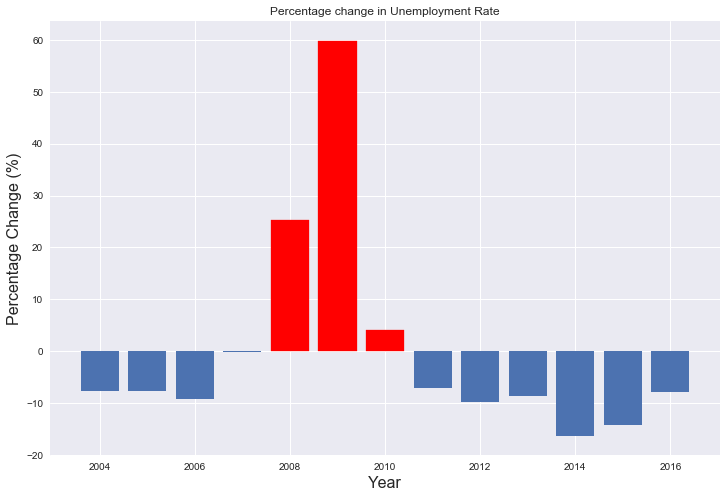

In [21]:
plt.figure(figsize=(12,8))
barlist=plt.bar(left=regions_data['Year'],height=regions_data['UnemploymentChange'])
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
plt.xlabel("Year",fontdict={'fontsize':16})
plt.ylabel("Percentage Change (%)",fontdict={'fontsize':16})
plt.title('Percentage change in Unemployment Rate')

# Loading monthly unemployment rate data

In [22]:
non_veterans_monthly_18_and_over_annually=pd.read_csv("NonVeterans_monthly_18_and_over.csv")

In [23]:
non_veterans_monthly_18_and_over_annually_rate=non_veterans_monthly_18_and_over_annually[non_veterans_monthly_18_and_over_annually['series_title'].str.contains("Rate")]

In [24]:
non_veterans_monthly_18_and_over_annually_rate_all=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over"]
non_veterans_monthly_18_and_over_annually_rate_men=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Men")]
non_veterans_monthly_18_and_over_annually_rate_women=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Women")]
non_veterans_monthly_18_and_over_annually_rate_Asian=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Asian")]
non_veterans_monthly_18_and_over_annually_rate_black=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Black")]
non_veterans_monthly_18_and_over_annually_rate_Hispanic=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Hispanic")]
non_veterans_monthly_18_and_over_annually_rate_white=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("White")]


# Box Plot depicting unemployment rate ( All genders ) over the years

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_all['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_all['value'],
    name = 'All',
    xaxis="Year",
    yaxis="Rate",
    marker =dict(color='black')
)

layout= go.Layout(
    title= 'Unemployment Rate (All)',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
iplot(fig)



In [26]:
men_women_combined_monthly=non_veterans_monthly_18_and_over_annually_rate_men.append(non_veterans_monthly_18_and_over_annually_rate_women)

# Box Plot depicting unemployment rate (Men and Women ) over the years

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



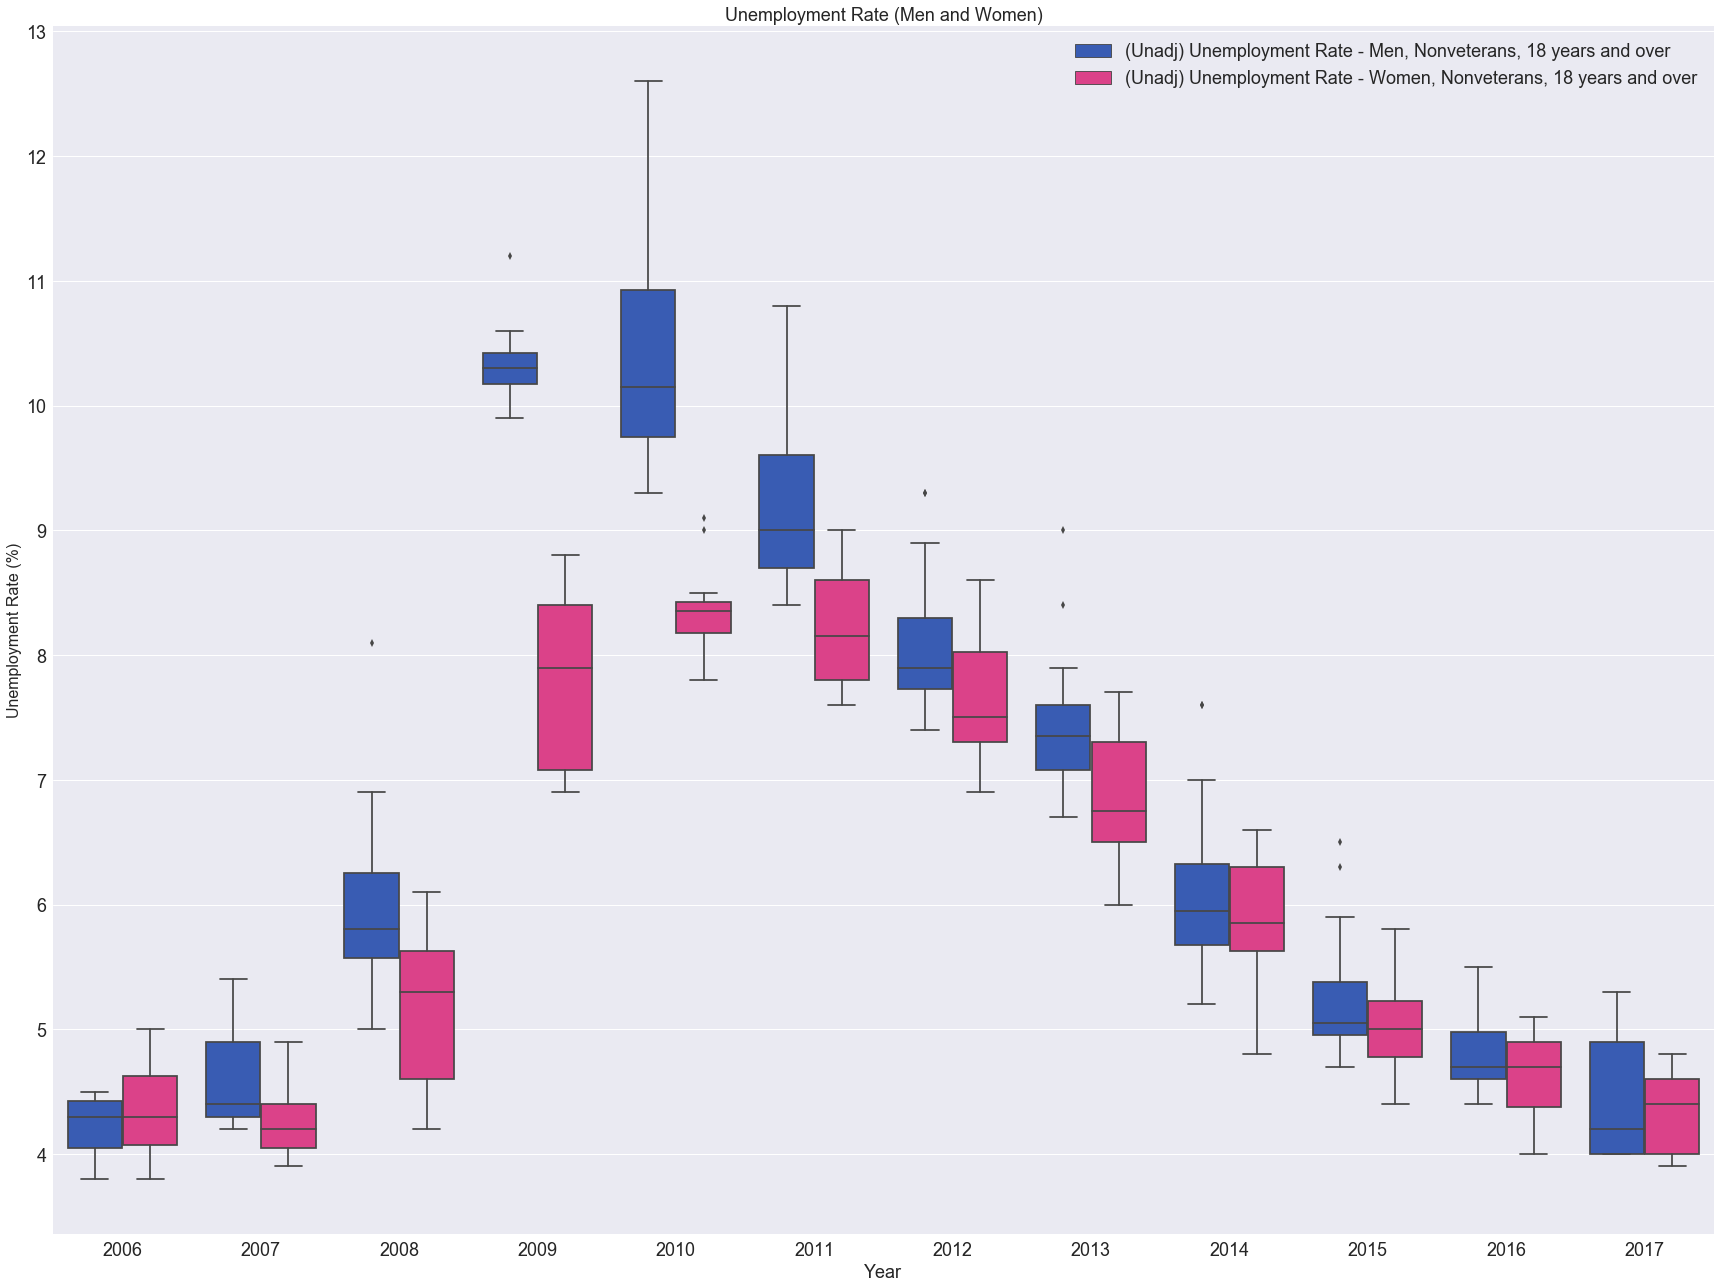

In [27]:
import numpy as np
plt.figure(figsize=(24,18))
plt.yticks(np.arange(0, 100, 1),fontsize=18)
plt.xticks(fontsize=18)
sns.boxplot(x='year',y='value',data=men_women_combined_monthly,hue='series_title',palette=['#2554C7','#F52887'])
plt.title('Unemployment Rate (Men and Women)',fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontsize=16)
plt.tight_layout()
plt.legend(fontsize=18)

In [28]:
all_races_combined=pd.concat([non_veterans_monthly_18_and_over_annually_rate_Asian,non_veterans_monthly_18_and_over_annually_rate_Hispanic,non_veterans_monthly_18_and_over_annually_rate_black,non_veterans_monthly_18_and_over_annually_rate_white])

# Box Plot depicting unemployment rate across different races

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



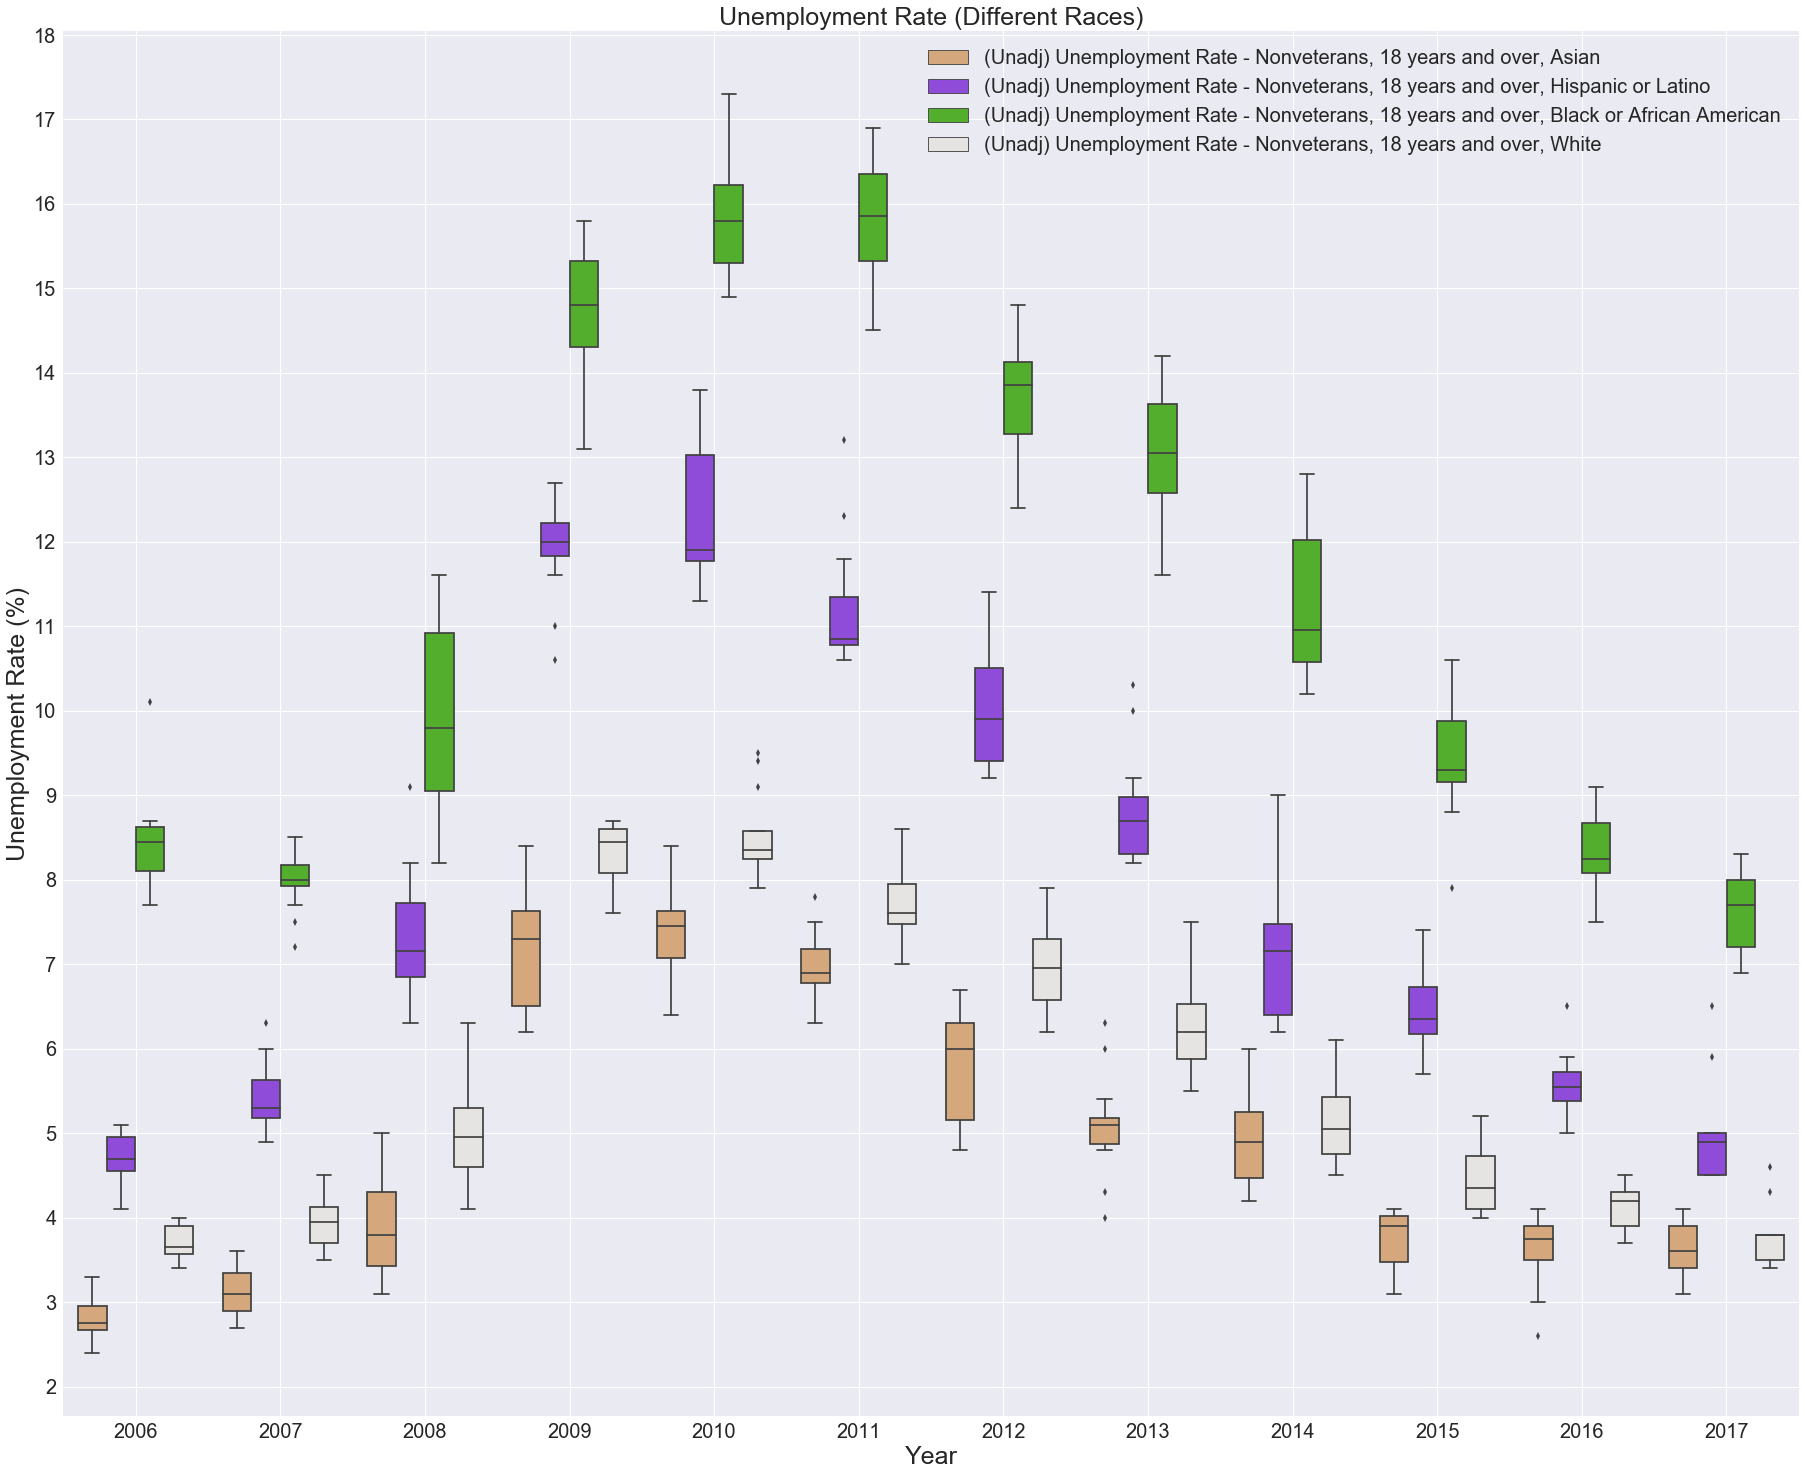

In [29]:
import numpy as np
plt.figure(figsize=(25,20))
plt.yticks(np.arange(0, 100, 1),fontsize=20)
plt.xticks(fontsize=20)
plt.tight_layout()
plt.grid(True,which='both')
sns.boxplot(x='year',y='value',data=all_races_combined,hue='series_title',palette=['#E2A76F','#8E35EF','#4CC417','#E5E4E2'])
plt.legend(fontsize=20)
plt.title('Unemployment Rate (Different Races)',fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Unemployment Rate (%)', fontsize=25)
plt.grid(True)


# Interactive box plots for the same data¶

In [30]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_women['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_women['value'],
    name = 'Women',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_men['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_men['value'],
    name = 'Men',
    xaxis="Year",
    yaxis="Rate"
)


fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Women','Unemployment Rate Men'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [31]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_Asian['value'],
    name = 'Asian',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_Hispanic['value'],
    name = 'Hispanic or Latino',
    xaxis="Year",
    yaxis="Rate"
)




fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Asian','Unemployment Rate Hispanic or Latino'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)



fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [32]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_black['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_black['value'],
    name = 'Black or African American',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_white['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_white['value'],
    name = 'White',
    xaxis="Year",
    yaxis="Rate"
)




fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Black or African American','Unemployment Rate White'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)



fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [33]:
non_veterans_monthly_18_and_over_annually_rate_all.to_csv("All_unemployment.csv")

# Line chart showing the overall unemploymnet rate for every month in a given year (2006-2016)

In [34]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate(All)',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Men) for every month in a given year (2006-2016)

In [35]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Men',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Women) for every month in a given year (2006-2016)



In [36]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Women',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Asian) for every month in a given year (2006-2016)

In [37]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Asian',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 1,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Black or African American ) for every month in a given year (2006-2016)

In [38]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Black or African American',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Hispanic or Latino) for every month in a given year (2006-2016)

In [39]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Hispanic or Latino',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Whites) for every month in a given year (2006-2016)

In [40]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate White',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Convert the annual data into a format suitable for cluster Maps

In [41]:
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate.pivot_table(index="year",columns="series_title",values="value")
non_veterans_18_and_over_annually.reset_index(level=0,inplace=True)

# Changing the column names so that they are clearly visible in cluster maps

In [42]:
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over':'All'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Men, Nonveterans, 18 years and over':'Men'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Women, Nonveterans, 18 years and over':'Women'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Asian':'Asian'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Black or African American':'Black/African American'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, White':'White'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Hispanic or Latino':'Hispanic or Latino'})



/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



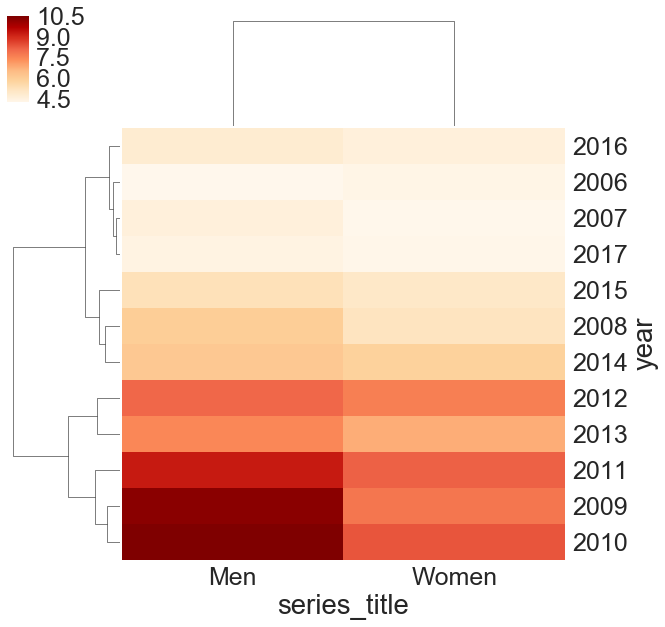

In [43]:
plt.figure(figsize=(1,1))
sns.set(font_scale=2.5)
g=sns.clustermap(data=non_veterans_monthly_18_and_over_annually_rate_pivot.iloc[:,[0,-1]],cmap="OrRd",col_cluster=True)
#plt.xlabel('Unemployment Rate(%)',fontsize=15)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


# Statewise Data

In [44]:
input_data = pd.read_csv('statewise_data.csv')
years = range(2003, 2017)

In [45]:
input_data['ScaledWorkForce'] = input_data['WorkForce'] / 1000000

In [46]:
input_data.head()

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
0,2003,AL,Alabama,"45,03,491",2120238,1992742,93.986713,127496,6.013287,15.06,6.37,7.97,11.52,18.33,27.23,2.120238
1,2003,AK,Alaska,"6,48,414",331673,305725,92.176632,25948,7.823368,19.51,8.38,11.18,16.55,24.64,34.00,0.331673
2,2003,AZ,Arizona,"55,10,364",2736001,2578855,94.256362,157146,5.743638,16.14,6.68,8.63,12.76,19.54,28.87,2.736001
3,2003,AR,Arkansas,"27,24,816",1271706,1196303,94.070721,75403,5.929279,13.72,6.41,7.95,10.99,16.32,23.41,1.271706
4,2003,CA,California,"3,52,53,159",17277624,16102841,93.200552,1174783,6.799448,19.54,7.52,9.46,14.99,24.28,36.62,17.277624


# Finding the top 7 states with highest workforce

In [47]:
#to find the names of top 7 states with the highest WorkForce population
temp = input_data.groupby('STATE').sum()
temp.sort_values('WorkForce', ascending=False).head(7)

,Year,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
STATE,,,,,,,,,,,,,
California,28133,254782233,234796026,1290.483631,19986207,109.516369,330.05,122.34,153.92,246.61,415.46,643.15,254.782233
Texas,28133,168988560,159020716,1317.396214,9967844,82.603786,275.13,106.17,133.26,206.02,335.61,517.42,168.988560
New York,28133,133517187,124965430,1310.394940,8551757,89.605060,340.11,118.95,160.34,255.66,420.02,652.84,133.517187
Florida,28133,128219277,119868151,1309.226072,8351126,90.773928,261.10,111.22,136.78,198.12,309.29,471.13,128.219277
Illinois,28133,91394002,84745228,1298.300936,6648774,101.699064,302.00,115.76,145.82,229.31,378.09,567.78,91.394002
Pennsylvania,28133,89103301,83591106,1313.500783,5512195,86.499217,280.35,112.57,146.83,220.19,342.81,510.02,89.103301
Ohio,28133,81582345,76000975,1304.248873,5581370,95.751127,272.02,112.13,142.03,215.19,336.56,484.52,81.582345


In [48]:
top_states_workforce = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio']

# Unemployment Rate for top 7 states with highest workforce

In [49]:
measure = "UnemployedPercent"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California']['UnemployedPercent'], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['UnemployedPercent']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Texas']['Year'], y = input_data[input_data['STATE'] == 'Texas'][measure], 
                    mode = 'lines+markers', name = 'Texas', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Texas']['UnemployedPercent']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'New York']['Year'], y = input_data[input_data['STATE'] == 'New York'][measure], 
                    mode = 'lines+markers', name = 'New York', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'New York']['UnemployedPercent']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'Florida']['Year'], y = input_data[input_data['STATE'] == 'Florida'][measure], 
                    mode = 'lines+markers', name = 'Florida', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Florida']['UnemployedPercent']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Illinois']['Year'], y = input_data[input_data['STATE'] == 'Illinois'][measure], 
                    mode = 'lines+markers', name = 'Illinois', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Illinois']['UnemployedPercent']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Pennsylvania']['Year'], y = input_data[input_data['STATE'] == 'Pennsylvania'][measure], 
                    mode = 'lines+markers', name = 'Pennsylvania', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Pennsylvania']['UnemployedPercent']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Ohio']['Year'], y = input_data[input_data['STATE'] == 'Ohio'][measure], 
                    mode = 'lines+markers', name = 'Ohio', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Ohio']['UnemployedPercent']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['UnemployedPercent']])

layout = go.Layout(
    title= 'Unemployment Rate (top 7 states with the highest WorkForce population)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Unemployment Rate (top 5 states with the highest Unemployment Rate and 2 states with least unemployment rate )

In [50]:
input_data.sort_values('UnemployedPercent', ascending=False)['STATE'].unique()

array(['Puerto Rico', 'Michigan', 'Nevada', 'California', 'Oregon',
       'South Carolina', 'Rhode Island', 'Florida', 'Alabama',
       'North Carolina', 'Georgia', 'Tennessee', 'Illinois', 'Mississippi',
       'Indiana', 'Arizona', 'Kentucky', 'Ohio', 'Washington', 'Missouri',
       'New Jersey', 'Connecticut', 'Idaho', 'Colorado', 'Wisconsin',
       'West Virginia', 'New York', 'Pennsylvania', 'Delaware',
       'Massachusetts', 'Arkansas', 'Texas', 'Maine', 'New Mexico',
       'Louisiana', 'Alaska', 'Utah', 'Minnesota', 'Maryland', 'Montana',
       'Hawaii', 'Virginia', 'Kansas', 'Oklahoma', 'Vermont', 'Wyoming',
       'Iowa', 'New Hampshire', 'South Dakota', 'Nebraska', 'North Dakota'], dtype=object)

In [51]:
input_data.sort_values('UnemployedPercent', ascending=True)['STATE'].unique()

array(['Utah', 'Hawaii', 'North Dakota', 'Wyoming', 'South Dakota',
       'New Hampshire', 'Nebraska', 'Virginia', 'Idaho', 'Florida',
       'Vermont', 'Colorado', 'Delaware', 'Maryland', 'Montana', 'Iowa',
       'Massachusetts', 'Minnesota', 'Oklahoma', 'New Mexico', 'Arizona',
       'Maine', 'Alabama', 'Arkansas', 'Nevada', 'Wisconsin', 'Kansas',
       'Louisiana', 'New Jersey', 'Texas', 'Connecticut', 'West Virginia',
       'Pennsylvania', 'Indiana', 'Missouri', 'Illinois', 'New York',
       'Georgia', 'Tennessee', 'Washington', 'North Carolina',
       'South Carolina', 'Oregon', 'California', 'Ohio', 'Michigan',
       'Rhode Island', 'Kentucky', 'Mississippi', 'Alaska', 'Puerto Rico'], dtype=object)

In [52]:
measure = "UnemployedPercent"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'Puerto Rico']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico']['WorkForce']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Michigan']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan']['WorkForce']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'Nevada']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada']['WorkForce']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California'][measure], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['WorkForce']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Oregon']['Year'], y = input_data[input_data['STATE'] == 'Oregon'][measure], 
                    mode = 'lines+markers', name = 'Oregon', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Oregon']['WorkForce']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Utah'][measure], 
                    mode = 'lines+markers', name = 'Utah', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Utah']['WorkForce']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Hawaii']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii']['WorkForce']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['WorkForce']])

layout = go.Layout(
    title= '5 states with highest Unemployment Rate, 2 states with least Unemployment Rate during the Great Recession',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Median Hourly Wage (top 5 states with the highest Unemployment Rate)

In [53]:
measure = "H_MEDIAN"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'Puerto Rico']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico']['WorkForce']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Michigan']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan']['WorkForce']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'Nevada']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada']['WorkForce']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California'][measure], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['WorkForce']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Oregon']['Year'], y = input_data[input_data['STATE'] == 'Oregon'][measure], 
                    mode = 'lines+markers', name = 'Oregon', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Oregon']['WorkForce']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Utah'][measure], 
                    mode = 'lines+markers', name = 'Utah', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Utah']['WorkForce']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Hawaii']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii']['WorkForce']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['WorkForce']])

layout = go.Layout(
    title= '5 states with highest Unemployment Rate, 2 states with least Unemployment Rate during the Great Recession',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Median Hourly Wage ($)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Unemployment Rate vs Total Workforce

In [54]:
measure1 = "UnemployedPercent"
measure2 = "ScaledWorkForce"
text = "WorkForce"

graph1y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure1], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico'][text]])
graph1y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure2], 
                    mode = 'lines+markers', name = 'Puerto Rico', yaxis='y2',
                    line = dict(color = ('Firebrick'), dash = 'dash'),
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico'][text]])

graph2y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure1], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan'][text]])
graph2y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure2], 
                    mode = 'lines+markers', name = 'Michigan', yaxis='y2',
                    line = dict(color = ('#5f9ea0'), dash = 'dash'),
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan'][text]])

graph3y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure1], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada'][text]])
graph3y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure2], 
                    mode = 'lines+markers', name = 'Nevada', yaxis='y2',
                    line = dict(color = ('#6b8e23'), dash = 'dash'),
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada'][text]])

graph4y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'California'][measure1], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California'][text]])
graph4y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'California'][measure2], 
                    mode = 'lines+markers', name = 'California', yaxis='y2',
                    line = dict(color = ('black'), dash = 'dash'),
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California'][text]])

graph5y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure1], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii'][text]])
graph5y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure2], 
                    mode = 'lines+markers', name = 'Hawaii', yaxis='y2',
                    line = dict(color = ('#b8860b'), dash = 'dash'),
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii'][text]])

graph6y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure1], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana'][text]])
graph6y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure2], 
                    mode = 'lines+markers', name = 'Indiana', yaxis='y2',
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana'][text]])


layout = go.Layout(
    title= 'Unemployment Rate against the Total Workforce during years 2003-2016',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    legend=dict(x=-.3, y=1),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
    ),
    yaxis2=dict(
        title= 'Total Workforce (in millions)',
        overlaying='y',
        side='right'
    ),
    showlegend= True
)

data = [graph1y1, graph1y2, graph2y1, graph2y2, graph3y1, graph3y2, graph4y1, graph4y2, graph5y1, graph5y2, graph6y1, graph6y2]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Loading Data for hourly Wages across different job types

In [55]:
ocuupationalHourlyAnnually=pd.read_excel("OccupationalHourlyAnnualyWage.xlsx")

# Check Differnt Job Types

In [56]:
ocuupationalHourlyAnnually['Series Name'].unique()

array(['All Occupations', 'Management occupations',
       'Business and financial operations occupations',
       'Computer and mathematical occupations',
       'Architecture and engineering occupations',
       'Life, physical, and social science occupations',
       'Community and social services occupations', 'Legal occupations',
       'Education, training, and library occupations',
       'Arts, design, entertainment, sports, and media occupations',
       'Healthcare practitioners and technical occupations',
       'Healthcare support occupations', 'Protective service occupations',
       'Food preparation and serving related occupations',
       'Building and grounds cleaning and maintenance occupations',
       'Personal care and service occupations',
       'Sales and related occupations',
       'Office and administrative support occupations',
       'Farming, fishing, and forestry occupations',
       'Construction and extraction occupations',
       'Installation, mainten

# Mean Hourly Pay

In [57]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Year'],
    y = (ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Hourly Mean ']),
    mode = 'lines+markers',
    name = 'All',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Management',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Business and financial operations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Computer and mathematical',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Architecture and engineering',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Life, physical, and social science',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Community and social services',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Legal',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Education, training, and library',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Arts, design, entertainment, sports, and media',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Healthcare practitioners and technical',
)


trace11 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Healthcare support',
)



layout= go.Layout(
    title= 'Mean Hourly Pay(All)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Mean Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=10
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



In [58]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Protective service',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Food preparation and serving related',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Building and grounds cleaning and maintenance occupations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Personal care and service',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Sales and related occupations',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Office and administrative support',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Farming, fishing, and forestry occupations',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Construction and extraction',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Installation, maintenance, and repair occupations',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Production',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Hourly Mean '],
    mode = 'lines+markers',
    name = 'Transportation and material moving',
)



layout= go.Layout(
    title= 'Mean Hourly Pay',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Mean Hourly Pay($)',
        ticklen= 1,
        gridwidth= 2,
        dtick=5
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# YOY Percentage Change in Mean Hourly Pay

In [59]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'All',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Management',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Business and financial operations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Computer and mathematical',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Architecture and engineering',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Life, physical, and social science',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Community and social services',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Legal',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Education, training, and library',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Arts, design, entertainment, sports, and media',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Healthcare practitioners and technical',
)


trace11 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Healthcare support',
)



layout= go.Layout(
    title= 'Mean Hourly Pay(All)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Perctage Change Mean Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.5
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



In [60]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Protective service',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Food preparation and serving related',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Building and grounds cleaning and maintenance occupations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Personal care and service',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Sales and related occupations',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Office and administrative support',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Farming, fishing, and forestry occupations',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Construction and extraction',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Installation, maintenance, and repair occupations',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Production',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Hourly Mean '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Transportation and material moving',
)



layout= go.Layout(
    title= 'Mean Hourly Pay',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change in Mean Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Median Hourly Pay

In [61]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'All',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Management',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Business and financial operations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Computer and mathematical',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Architecture and engineering',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Life, physical, and social science',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Community and social services',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Legal',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Education, training, and library',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Arts, design, entertainment, sports, and media',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Healthcare practitioners and technical',
)


trace11 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Healthcare support',
)



layout= go.Layout(
    title= 'Median Hourly Pay(All)',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change in Median Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=10
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



In [62]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Protective service',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Food preparation and serving related',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Building and grounds cleaning and maintenance occupations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Personal care and service',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Sales and related occupations',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Office and administrative support',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Farming, fishing, and forestry occupations',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Construction and extraction',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Installation, maintenance, and repair occupations',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Production',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Hourly Median '],
    mode = 'lines+markers',
    name = 'Transportation and material moving',
)



layout= go.Layout(
    title= 'Median Hourly Pay',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Median Hourly Pay($)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# YOY Percentage Change in Median Hourly Pay

In [63]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="All Occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'All',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Management occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Management',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Business and financial operations occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Business and financial operations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Computer and mathematical occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Computer and mathematical',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Architecture and engineering occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Architecture and engineering',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Life, physical, and social science occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Life, physical, and social science',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Community and social services occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Community and social services',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Legal occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Legal',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Education, training, and library occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Education, training, and library',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Arts, design, entertainment, sports, and media occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Arts, design, entertainment, sports, and media',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare practitioners and technical occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Healthcare practitioners and technical',
)


trace11 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Healthcare support occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Healthcare support',
)



layout= go.Layout(
    title= 'Median Hourly Pay(All)',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change in Median Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.5
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



In [64]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Protective service occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Protective service',
)

trace1 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Food preparation and serving related occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Food preparation and serving related',
)

trace2 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Building and grounds cleaning and maintenance occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Building and grounds cleaning and maintenance occupations',
)

trace3 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Personal care and service occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Personal care and service',
)

trace4 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Sales and related occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Sales and related occupations',
)

trace5 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Office and administrative support occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Office and administrative support',
)

trace6 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Farming, fishing, and forestry occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Farming, fishing, and forestry occupations',
)

trace7 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Construction and extraction occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Construction and extraction',
)

trace8 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Installation, maintenance, and repair occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Installation, maintenance, and repair occupations',
)

trace9 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Production occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Production',
)

trace10 = go.Scatter(
    x = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Year'],
    y = ocuupationalHourlyAnnually[ocuupationalHourlyAnnually['Series Name']=="Transportation and material moving occupations"]['Hourly Median '].pct_change()*100,
    mode = 'lines+markers',
    name = 'Transportation and material moving',
)



layout= go.Layout(
    title= 'Median Hourly Pay',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change in Median Hourly Pay(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)


data = [trace0,trace1,trace2,trace4,trace5,trace6,trace7,trace8,trace9,trace10]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Loading the data for Unmployment rates across different industries


In [65]:
PrivateWageAndSalaryWorkers=pd.read_csv('PrivateWageAndSalaryWorkers.csv')

In [66]:
PrivateWageAndSalaryWorkers.head()

,series_id,year,period,value,footnote_codes,date,series_title
0,LNU04032238,2003,M13,3.5,NaN,12/31/03,(Unadj) Unemployment Rate - Financial Activiti...
1,LNU04032231,2003,M13,9.3,NaN,12/31/03,(Unadj) Unemployment Rate - Construction Indus...
2,LNU04032235,2003,M13,6.0,NaN,12/31/03,(Unadj) Unemployment Rate - Wholesale and Reta...
3,LNU04032237,2003,M13,6.8,NaN,12/31/03,(Unadj) Unemployment Rate - Information Indust...
4,LNU04032239,2003,M13,8.2,NaN,12/31/03,(Unadj) Unemployment Rate - Professional and B...


# Checking the different industries

In [67]:
PrivateWageAndSalaryWorkers['series_title'].unique()

array([ '(Unadj) Unemployment Rate - Financial Activities Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Construction Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Wholesale and Retail Trade, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Information Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Professional and Business Services Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Leisure and Hospitality, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Manufacturing Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Non Durable Goods Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Other Services Industry, Private Wage and Salary Workers',
       '(Unadj) Unemployment Rate - Education and Health Services, Private Wage and Salary Workers',
       '(Unadj) U

# Creating separate for dataframes for different industries



In [68]:
PrivateWageAndSalaryWorkers_financial=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Financial Activities Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_construction=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Construction Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Wholesale=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Wholesale and Retail Trade, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Information=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Information Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Professional=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Professional and Business Services Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Leisure=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Leisure and Hospitality, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Manufacturing=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Manufacturing Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Non_Durable=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Non Durable Goods Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Other_Services=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Other Services Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Education_Health=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Education and Health Services, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Transportation=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Transportation and Utilities Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Durable_Goods=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Durable Goods Industry, Private Wage and Salary Workers"]
PrivateWageAndSalaryWorkers_Government=PrivateWageAndSalaryWorkers[PrivateWageAndSalaryWorkers['series_title']=="(Unadj) Unemployment Rate - Government Wage and Salary Workers"]


# Unemployment Rate across different industries

In [69]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_financial['year'],
    y = PrivateWageAndSalaryWorkers_financial['value'],
    mode = 'lines+markers',
    name = 'Financial Activities Industry',

)

trace1 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_construction['year'],
    y = PrivateWageAndSalaryWorkers_construction['value'],
    mode = 'lines+markers',
    name = 'Construction Industry',

)

trace2 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Wholesale['year'],
    y = PrivateWageAndSalaryWorkers_Wholesale['value'],
    mode = 'lines+markers',
    name = 'Wholesale and Retail Trade',

)

trace3 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Information['year'],
    y = PrivateWageAndSalaryWorkers_Information['value'],
    mode = 'lines+markers',
    name = 'Information Industry',

)

trace4 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Professional['year'],
    y = PrivateWageAndSalaryWorkers_Professional['value'],
    mode = 'lines+markers',
    name = 'Professional and Business Services Industry',

)

trace5 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Leisure['year'],
    y = PrivateWageAndSalaryWorkers_Leisure['value'],
    mode = 'lines+markers',
    name = 'Leisure and Hospitality',

)

trace6 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Manufacturing['year'],
    y = PrivateWageAndSalaryWorkers_Manufacturing['value'],
    mode = 'lines+markers',
    name = 'Manufacturing Industry',

)

trace7 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Non_Durable['year'],
    y = PrivateWageAndSalaryWorkers_Non_Durable['value'],
    mode = 'lines+markers',
    name = 'Non Durable Goods Industry',

)

trace8 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Other_Services['year'],
    y = PrivateWageAndSalaryWorkers_Other_Services['value'],
    mode = 'lines+markers',
    name = 'Other Services Industry',

)

trace9 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Education_Health['year'],
    y = PrivateWageAndSalaryWorkers_Education_Health['value'],
    mode = 'lines+markers',
    name = 'Education and Health Services',

)

trace10 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Transportation['year'],
    y = PrivateWageAndSalaryWorkers_Transportation['value'],
    mode = 'lines+markers',
    name = 'Transportation and Utilities Industry',

)

trace11 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Durable_Goods['year'],
    y = PrivateWageAndSalaryWorkers_Durable_Goods['value'],
    mode = 'lines+markers',
    name = 'Durable Goods Industry',

)

layout= go.Layout(
    title= 'Unemployment Rate(All)',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.5
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# YOY Change in Unemployment Rate across different industries

In [70]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_financial['year'],
    y = PrivateWageAndSalaryWorkers_financial['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Financial Activities Industry',

)

trace1 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_construction['year'],
    y = PrivateWageAndSalaryWorkers_construction['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Construction Industry',

)

trace2 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Wholesale['year'],
    y = PrivateWageAndSalaryWorkers_Wholesale['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Wholesale and Retail Trade',

)

trace3 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Information['year'],
    y = PrivateWageAndSalaryWorkers_Information['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Information Industry',

)

trace4 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Professional['year'],
    y = PrivateWageAndSalaryWorkers_Professional['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Professional and Business Services Industry',

)

trace5 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Leisure['year'],
    y = PrivateWageAndSalaryWorkers_Leisure['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Leisure and Hospitality',

)

trace6 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Manufacturing['year'],
    y = PrivateWageAndSalaryWorkers_Manufacturing['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Manufacturing Industry',

)

trace7 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Non_Durable['year'],
    y = PrivateWageAndSalaryWorkers_Non_Durable['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Non Durable Goods Industry',

)

trace8 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Other_Services['year'],
    y = PrivateWageAndSalaryWorkers_Other_Services['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Other Services Industry',

)

trace9 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Education_Health['year'],
    y = PrivateWageAndSalaryWorkers_Education_Health['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Education and Health Services',

)

trace10 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Transportation['year'],
    y = PrivateWageAndSalaryWorkers_Transportation['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Transportation and Utilities Industry',

)

trace11 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Durable_Goods['year'],
    y = PrivateWageAndSalaryWorkers_Durable_Goods['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Durable Goods Industry',

)

layout= go.Layout(
    title= 'Unemployment Rate(All)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Unemployment Rate(% Change)',
        ticklen= 1,
        gridwidth= 2,
        dtick=5
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=900, width=1000)
iplot(fig)



# Top 5 affected industries

In [71]:
import plotly.graph_objs as go
# Create traces


trace1 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_construction['year'],
    y = PrivateWageAndSalaryWorkers_construction['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Construction Industry',
    marker = dict(
        color = '#6dccda'
    )

)


trace2 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Information['year'],
    y = PrivateWageAndSalaryWorkers_Information['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Information Industry',
    marker = dict(
        color = '#cdcc5d'
    )


)

trace3 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Professional['year'],
    y = PrivateWageAndSalaryWorkers_Professional['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Professional and Business Services Industry',
    marker = dict(
        color = '#a2a2a2'
    )

)



trace4 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Manufacturing['year'],
    y = PrivateWageAndSalaryWorkers_Manufacturing['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Manufacturing Industry',
        marker = dict(
        color = '#ed97ca'
    )

)

trace5 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Non_Durable['year'],
    y = PrivateWageAndSalaryWorkers_Non_Durable['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Non Durable Goods Industry',
    marker = dict(
        color = '#a8786e'
    )

)






layout= go.Layout(
    title= 'Unemployment Rate % Change (Top 5 Affected Industries)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1,
        titlefont=dict(
            size=18,
        ),
    ),
    yaxis=dict(
        title= 'Unemployment Rate(% Change)',
        ticklen= 1,
        gridwidth= 2,
        dtick=10,
        titlefont=dict(
            size=18,
        ),
    ),
    showlegend= True
)

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=600, width=1100)
iplot(fig)



In [72]:
import plotly.graph_objs as go
# Create traces


trace1 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_construction['year'],
    y = PrivateWageAndSalaryWorkers_construction['value'],
    mode = 'lines+markers',
    name = 'Construction Industry',
    marker = dict(
        color = '#6dccda'
    )

)


trace2 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Information['year'],
    y = PrivateWageAndSalaryWorkers_Information['value'],
    mode = 'lines+markers',
    name = 'Information Industry',
    marker = dict(
        color = '#cdcc5d'
    )


)

trace3 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Professional['year'],
    y = PrivateWageAndSalaryWorkers_Professional['value'],
    mode = 'lines+markers',
    name = 'Professional and Business Services Industry',
    marker = dict(
        color = '#a2a2a2'
    )

)



trace4 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Manufacturing['year'],
    y = PrivateWageAndSalaryWorkers_Manufacturing['value'],
    mode = 'lines+markers',
    name = 'Manufacturing Industry',
        marker = dict(
        color = '#ed97ca'
    )

)

trace5 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Non_Durable['year'],
    y = PrivateWageAndSalaryWorkers_Non_Durable['value'],
    mode = 'lines+markers',
    name = 'Non Durable Goods Industry',
    marker = dict(
        color = '#a8786e'
    )

)






layout= go.Layout(
    title= 'Unemployment Rate(Top 5 Affected Industries)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1,
        titlefont=dict(
            size=18,
        ),
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=5,
        titlefont=dict(
            size=18,
        ),
    ),
    legend=dict(
    font=dict(
            family='sans-serif',
            size=16,
            color='#000'
        )
    ),
    showlegend= True
)

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=600, width=1100)
iplot(fig)



# Unemployment rate for Government jobs

In [73]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Government['year'],
    y = PrivateWageAndSalaryWorkers_Government['value'],
    mode = 'lines+markers',
    name = 'Government',

)

layout= go.Layout(
    title= 'Unemployment Rate(Government)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# YOY Change in Unemployment Rate for Government Jobs

In [74]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = PrivateWageAndSalaryWorkers_Government['year'],
    y = PrivateWageAndSalaryWorkers_Government['value'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Government',

)

layout= go.Layout(
    title= 'Unemployment Rate(Government)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Unemployment Rate',
        ticklen= 1,
        gridwidth= 2,
        dtick=10
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Converting the data into a pivot for Cluster Map

In [75]:
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers.pivot_table(index="year",columns="series_title",values="value")


In [76]:
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Construction Industry, Private Wage and Salary Workers':'Construction'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Durable Goods Industry, Private Wage and Salary Workers':'Durable Goods'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Education and Health Services, Private Wage and Salary Workers':'Education and Health'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Financial Activities Industry, Private Wage and Salary Workers':'Financial Activities'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Information Industry, Private Wage and Salary Workers':'Information'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Leisure and Hospitality, Private Wage and Salary Workers':'Leisure & Hospitality'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Manufacturing Industry, Private Wage and Salary Workers':'Manufacturing'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Non Durable Goods Industry, Private Wage and Salary Workers':'Non Durable Goods'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Other Services Industry, Private Wage and Salary Workers':'Other Services'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Professional and Business Services Industry, Private Wage and Salary Workers':'Professional & Business'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Transportation and Utilities Industry, Private Wage and Salary Workers':'Transportation & Utilities'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Wholesale and Retail Trade, Private Wage and Salary Workers':'Wholesale & Retail'})
PrivateWageAndSalaryWorkers_pivot=PrivateWageAndSalaryWorkers_pivot.rename(columns = {'(Unadj) Unemployment Rate - Government Wage and Salary Workers':'Government'})

In [77]:
PrivateWageAndSalaryWorkers_pivot

series_title,Construction,Durable Goods,Education and Health,Financial Activities,Government,Information,Leisure & Hospitality,Manufacturing,Non Durable Goods,Other Services,Professional & Business,Transportation & Utilities,Wholesale & Retail
year,,,,,,,,,,,,,
2003,9.3,6.9,3.6,3.5,2.8,6.8,8.7,6.6,6.1,5.7,8.2,5.3,6.0
2004,8.4,5.5,3.4,3.6,2.6,5.7,8.3,5.7,5.9,5.3,6.8,4.4,5.8
2005,7.4,4.6,3.4,2.9,2.5,5.0,7.8,4.9,5.3,4.8,6.2,4.1,5.4
2006,6.7,3.9,3.0,2.7,2.3,3.7,7.3,4.2,4.8,4.7,5.6,4.0,4.9
2007,7.4,4.2,3.0,3.0,2.3,3.6,7.4,4.3,4.5,3.9,5.3,3.9,4.7
2008,10.6,5.6,3.5,3.9,2.4,5.0,8.6,5.8,6.0,5.3,6.5,5.1,5.9
2009,19.0,12.9,5.3,6.4,3.6,9.2,11.7,12.1,10.6,7.5,10.8,8.9,9.0
2010,20.6,11.2,5.8,6.9,4.4,9.7,12.2,10.6,9.6,8.5,10.8,8.4,9.5
2011,16.4,9.2,5.6,6.4,4.7,7.3,11.6,9.0,8.5,8.8,9.7,8.2,8.9


# Cluster Map

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



Text(0.5,1,'Cluster Map for Unemployment Rate')

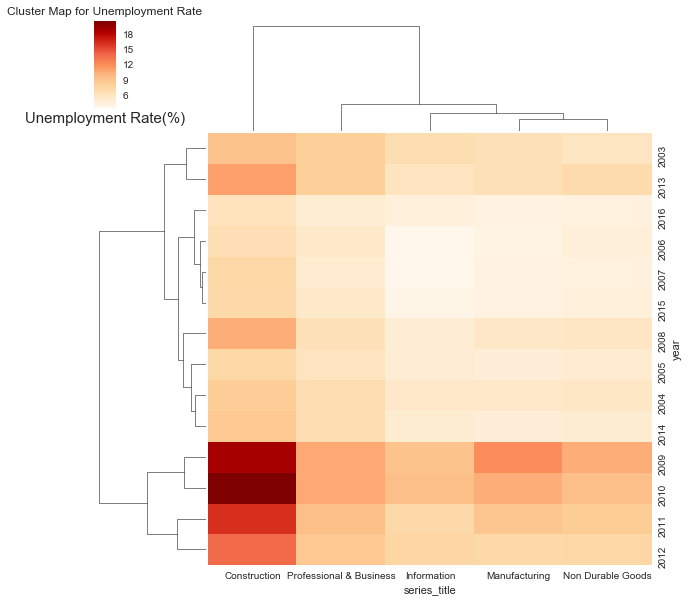

In [78]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1)
g=sns.clustermap(data=PrivateWageAndSalaryWorkers_pivot.iloc[:,[0,5,7,8,10]],cmap="OrRd",col_cluster=True)
plt.xlabel('Unemployment Rate(%)',fontsize=15)
plt.title('Cluster Map for Unemployment Rate')


# Loading Data for Education Level

In [79]:
education_data=pd.read_csv("Eudcation_level.csv")

In [80]:
education_data

,Year,Unemployment with advanced education (% of total labor force with advanced education),"Unemployment with advanced education, female (% of female labor force with advanced education)","Unemployment with advanced education, male (% of male labor force with advanced education)",Unemployment with intermediate education (% of total labor force with intermediate education)
0,2003,3.44,3.35,3.52,1.16
1,2004,3.04,3.14,2.95,1.05
2,2005,2.69,2.90,2.50,0.99
3,2006,2.41,2.66,2.18,0.90
4,2007,2.36,2.53,2.21,0.91
5,2008,3.01,3.12,2.91,1.17
6,2009,2.40,2.32,2.47,5.16
7,2010,2.45,2.41,2.49,5.45
8,2011,2.26,2.26,2.26,5.10
9,2012,2.10,2.20,2.00,4.60


# Unemployment Rate across different education levels

In [81]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = education_data['Year'],
    y = education_data['Unemployment with advanced education (% of total labor force with advanced education)'],
    mode = 'lines+markers',
    name = 'Advanced Education',
     marker = dict(
        color = '#a8786e'
    )
 

)

trace1 = go.Scatter(
    x = education_data['Year'],
    y = education_data['Unemployment with intermediate education (% of total labor force with intermediate education)'],
    mode = 'lines+markers',
    name = 'Intermediate Education',
    marker = dict(
        color = '#6dccda'
    )

)

layout= go.Layout(
    title= 'Unemployment Rate(Education Level)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0,trace1]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=600, width=1000)
iplot(fig)

# Yoy Change in unemployment Rate across different education levels

In [82]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = education_data['Year'],
    y = education_data['Unemployment with advanced education (% of total labor force with advanced education)'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Advanced Education',

)

trace1 = go.Scatter(
    x = education_data['Year'],
    y = education_data['Unemployment with intermediate education (% of total labor force with intermediate education)'].pct_change()*100,
    mode = 'lines+markers',
    name = 'Intermediate Education',

)

layout= go.Layout(
    title= 'Unemployment Rate(Education Level)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
        dtick=1
    ),
    yaxis=dict(
        title= 'Percenage Change in Unemployment Rate',
        ticklen= 1,
        gridwidth= 2,
        dtick=25
    ),
    legend=dict(orientation="h"),
    showlegend= True
)

data = [trace0,trace1]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=600, width=1000)
iplot(fig)